# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal
import math
import random
from base_agent import Agent
from collections import deque

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
from base_agent import Agent

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.045999998971819875


When finished, you can close the environment.

In [ ]:
env.close()

In [7]:
N_UPDATES = 10              # number of network-updates per agent-update
UPDATE_INTERVALS = 20       # number of timesteps between network-updates

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=10)

Episode 10	Last 100 Average Score: 0.85	Last Score: 0.96
Episode 20	Last 100 Average Score: 0.95	Last Score: 1.41
Episode 30	Last 100 Average Score: 1.45	Last Score: 3.61
Episode 40	Last 100 Average Score: 2.45	Last Score: 6.13
Episode 50	Last 100 Average Score: 4.24	Last Score: 17.94
Episode 60	Last 100 Average Score: 7.98	Last Score: 31.34
Episode 70	Last 100 Average Score: 11.68	Last Score: 35.55
Episode 80	Last 100 Average Score: 14.64	Last Score: 35.84
Episode 90	Last 100 Average Score: 17.05	Last Score: 37.70
Episode 100	Last 100 Average Score: 19.06	Last Score: 37.36
Episode 110	Last 100 Average Score: 22.70	Last Score: 37.38
Episode 120	Last 100 Average Score: 26.32	Last Score: 37.32
Episode 130	Last 100 Average Score: 29.79	Last Score: 37.41
Environment solved with average score of 30ast Score: 37.91


Text(0.5,0,'Episode #')

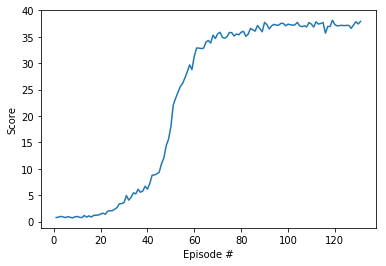

In [9]:
def launch_agent(n_episodes=350, max_t=1000):
    scores_deque = deque(maxlen=100)        # for score tracking and reporting; not part of learning algorithm
    all_scores = []                         # for score tracking and reporting; not part of learning algorithm
    max_score = -np.Inf                     # for score tracking and reporting; not part of learning algorithm
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]                 # reset the environment 
        states = env_info.vector_observations                             # get the current (first) state
        agent.reset()                                                     # reset the agent (OU noise back to mean 0)
        
        scores = np.zeros(num_agents)                                     # reset the score
        
        for t in range(max_t):
            actions = agent.act(states)                                   # get action from agent

            env_info = env.step(actions)[brain_name]                      # send action to the environment
            next_states = env_info.vector_observations                    # get next state
            rewards = env_info.rewards
            
            dones = env_info.local_done                                   # see if episode finished

            agent.remember(states, actions, rewards, next_states, dones)  # save experiences to replay buffer
            
            agent.update(N_UPDATES, UPDATE_INTERVALS, t)                  # sample and lear from replay buffer
            
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        
        scores_deque.append(np.mean(scores))          # for score tracking and reporting; not part of learning algorithm
        all_scores.append(np.mean(scores))            # for score tracking and reporting; not part of learning algorithm
        print('\rEpisode {}\t\nLast 100 Average Score: {:.2f}\tLast Score: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(scores)), end="")
        
        if i_episode % 10 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\t\nLast 100 Average Score: {:.2f}'.format(i_episode, np.mean(scores_deque))) 
        
        if np.mean(scores_deque) >= 30:
            print("\rEnvironment solved with average score of 30 ")
            break
    
    return all_scores

scores = launch_agent()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

In [10]:
env.close()

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))